# Introduction

Lending club is operating in the loan market. To improve their business performance and loan application management, they are seeking to implement machine learning model to evalute loan requests.  
This project will cover different solutions that could be applicable to Lending Clud business.  
Starting from the provided dataset (lendingclub-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv) different mahcine learning solutions will be described to predict the **loan grade**.  
The work has been divided into different sections:  
1) Data preparation and cleaning
In this section all the necessary steps will be performed to make the dataset ready for further analysis and machine learning model
2) Exploratory data analysis
In this section different analysis will be performed, sich statistical and outliers analysis to give more insights; also, new variables will be added.
3) Machine Learning
In this section different models will be prepared, described and tested.
4) Conclusion
A summary of all the results obtained.

A set up sub section has been included in the Introduction to import the dataset and the main libraries that will be needed.

# Set up

#### User-specified parameters

In [1]:
path_python_material = "C:/Users/mgaudioso/Desktop/python-material"

#### Import libraries & data 

In [2]:
import pandas as pd #type:ignore
import numpy as np #type:ignore
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(f"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")
df.head()

,Unnamed: 0,Unnamed: 1,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000,24000,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000,14000,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# Data cleaning

This section will cover all the preliminary steps needed to make the datset ready to be used and analyzed.
In details:

- Initial dropping of columns not needed
- Text column treatment
- Null values treatment & Label encoder
- Duplicates treatment

A new dataset will be created as copy of the original one.

In [3]:
df_dropped=df.copy()

In [4]:
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)


The dataset counts in total 100k rows and 143 columns.

## Initial dropping of columns

After a first analysis, some columns have been considered not required for the scope of this project:  
 - Unnamed: 0
 - Unnamed: 1
 - url  
 - title (this is only the title that has been provided for the loan)
 
 will be removed from the dataset.

In [5]:
#Dropping columns that have no relevant information for the analysis

list_to_drop = ['Unnamed: 0', 'Unnamed: 1','url','title']
df_dropped = df.drop(list_to_drop, axis = 1)

In [6]:
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 139)


## Text column treatment

Columns with text elements have been treated to adjust the format and replaced with the new treated values.

In [7]:
#Treating emp_title to have all the values present in the same format

df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()

In [8]:
#Removing the word 'month' from term column to make it numeric; there are only two types of values: 36 months and 60 months

df_dropped['term_numeric'] = df_dropped['term'].str.strip(" months")

In [9]:
#Removing % from interest rate to make it numeric

df_dropped['int_rate_clean'] = df_dropped['int_rate'].str.rstrip('%').astype('float') / 100.0
df_dropped['revo_util_clean'] = df_dropped['int_rate'].str.rstrip('%').astype('float') / 100.0

In [10]:
#Removing text from emp_lenght column. This could create confusion as there will no be distinction between <1 year and 1 year after the treatment. This column will be part of further treatment in "Feature Engineering" section to group all the info.

df_dropped.emp_length.value_counts()

emp_length
10+ years    32207
< 1 year      9306
2 years       9014
3 years       7862
1 year        6714
5 years       6158
4 years       6009
6 years       4496
7 years       4051
8 years       3919
9 years       3314
Name: count, dtype: int64

In [11]:
df_dropped['emp_length_clean']=df_dropped['emp_length'].str.rstrip('years')

In [12]:
df_dropped['emp_length_clean'] = df_dropped['emp_length_clean'].str.replace('+','').replace('<','',regex=True).str.strip()

In [13]:
#Dropping the columns not longer needed after the treatments

list_to_drop = ['emp_length','int_rate','term','emp_title','revol_util']
df_dropped = df_dropped.drop(list_to_drop, axis = 1)

In [14]:
#Checking the number of columns did not change as result of these treatments

print(f"df shape: {df_dropped.shape}")

df shape: (100000, 139)


## Date columns

In [15]:
#Addig a dummy year to allow the conversion to datetime

date_columns=['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','sec_app_earliest_cr_line','hardship_start_date','hardship_end_date','payment_plan_start_date']


for col in date_columns:
    df[col]=df[col]+'-2007'
    df[col]=pd.to_datetime(df[col],format='%d-%b-%Y',errors='coerce')
    df[col]=df[col].dt.strftime('%d-%b')   

## Null values & Label encoder

This section will cover the null values treatment. Different techniques have been applied based on the type of variable in each column. The scope is to have a dataset that does not contain any null values as results of this this section treatments.

In [16]:
#Checking all the columns that contain null values

df_dropped.columns[df_dropped.isna().sum() > 0]

Index(['dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num

A first investigation has been conducted separately on all the columns to group them in subgroups that will follow different approachs for the null values treatment.

In [17]:
#Removing features that would not be available at time of application

df_dropped = df_dropped.drop(columns = ["out_prncp",
                             "out_prncp_inv",
                             "total_pymnt",
                             "total_pymnt_inv",
                             "funded_amnt",
                             "funded_amnt_inv",
                             'deferral_term']
                            ) 

print(f"Number of columns: {len(df_dropped.columns)}")

Number of columns: 132


In [18]:
#Applying label encoder to the categorical variables

from sklearn.preprocessing import LabelEncoder #type: ignore

le = LabelEncoder()

categorical_columns=df_dropped.select_dtypes(include=['object']).columns
df_dropped[categorical_columns]=df_dropped[categorical_columns].astype(str)

for column in categorical_columns:
    df_dropped[column] = le.fit_transform(df_dropped[column])

In [19]:
# Group 1: Columns to be filled with 0 
# Assuming these features represent counts or amounts where a missing value means zero

fill_zero_cols = [
    'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
    'open_act_il', 'open_il_12m', 'open_il_24m',
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
    'all_util', 'inq_fi', 'total_cu_tl', 'acc_open_past_24mths',
    'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
    'inq_last_12m', 'pub_rec_bankruptcies','mths_since_rcnt_il']

df_dropped[fill_zero_cols] = df_dropped[fill_zero_cols].fillna(0)

In [20]:
# Group 2: Columns to be filled with median 
# Assuming these features are numeric and avoiding to have a big influence of outliers

fill_median_cols = [
 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
    'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
    'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim','dti','annual_inc_joint','dti_joint'
]
df_dropped[fill_median_cols] = df_dropped[fill_median_cols].apply(lambda x: x.fillna(x.median()))

In [21]:
#The rest of categorical variables will be treated with LabelEncoder to make sure they do not contain any null values

from sklearn.preprocessing import LabelEncoder #type: ignore

le = LabelEncoder()

categorical_columns=df_dropped.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_dropped[column] = le.fit_transform(df_dropped[column])

In [22]:
#Checking the columns with null values

df_dropped.columns[df_dropped.isnull().sum() > 0]

Index(['mths_since_last_delinq', 'mths_since_last_record',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'chargeoff_within_12_mths', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'tax_liens',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_amount',
       'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')

In [23]:
null_column=df_dropped.columns[df_dropped.isnull().sum() > 0]

In [24]:
df_dropped[null_column].shape

(100000, 26)

In [25]:
#The rest of null values will be replaced with zero, as assumed there is no information for the variable (ex: no hardship plan, no second application, no delinquency etc ..)

df_dropped[null_column] = df_dropped[null_column].fillna(0)

In [26]:
#Checking no more values present in the dataset

df_dropped.columns[df_dropped.isnull().sum() > 0]

Index([], dtype='object')

## Duplicates value

A check is performed to make sure no duplicates are present in the dataset. The column ID will be used as intented to be unique code for each loan application

In [27]:
duplicates = df_dropped['id'].duplicated().sum()
duplicates

0

As result of the first section, different actions have been taken to make sure the dataset can be used for the further analysis and machine learning models.  
To summarize:
- initial dropping of columns not containing any relevant information
- columns containing text have been adjusted to have a standard or numeric format
- null values have been treated and removed
- duplicates check 

# Exploratory analysis

After preparing the datset in the previous section, different analysis will be covered in this section to gain more insights about the dataset variables.  

 1- **Features engineering**  
Two new variables will be added:  
***emp_lenght_group***: this will allow to have a better plti for the variable emp_lenght and overcome the problem underlined under Text treatment subsection with values <1 years & 1 years that are figuring now as 1 after removing text from the variable;  
three groups will be created: 
    - short term: 0-2 years of employment
    - medium term: 3-7 years of employment
    - long term: >8 years of employemnt
the column emp_lenght will be removed as result of this treatment.  
 ***debt_to_income***: showing the ratio between income and loan_amnt; it will be useful for the model to have a direct variable indicating the relationship between these two variables.

 2- **Statistical measures & Outliers**
The two main numerical variables will be analyzed: annual_inc and Loan_amnt
After the statistical measures and histograms, the focus will be on the outliers, understanding their influence on the distribution

3- **Relationship analysis**
Significant variables will be selected for an heatmap trying to identify possible correlations.

4- **Feature scaling**
A standard scaler will be applied to all the numerical variables before the machine learning models. As result a new dataset will be created and used for the next section

## Features engineering

As mentione above, two new features wil be added

#### Emp_lenght_group

In [28]:
#emp_lenght_group

df_dropped['emp_length_group']=np.where(df_dropped['emp_length_clean']<=2,'Short term',
                                        np.where(df_dropped['emp_length_clean']>=8,'Long term','Medium term'))

In [29]:
#Dropping the variable emp_lenght_clean and encdding the new variable created

df_dropped=df_dropped.drop(columns='emp_length_clean')

Text(0.5, 1.0, 'Barplot Emp Lenght Group')

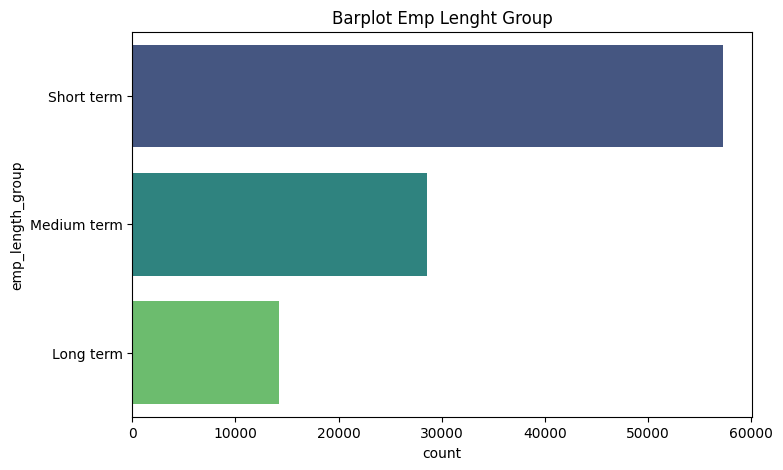

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

grade_counts=df_dropped['emp_length_group'].value_counts().reset_index()
grade_counts.columns=['emp_length_group','count']
sorted_grades=grade_counts.sort_values(by='count',ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='count',y='emp_length_group',data=sorted_grades,palette='viridis')

plt.title('Barplot Emp Lenght Group')

In [31]:
summary=df_dropped.groupby('emp_length_group')[['annual_inc','loan_amnt']].agg(['count','mean','median'])

pd.options.display.float_format = '{:,.2f}'.format

summary

annual_inc                     loan_amnt                    
                      count      mean    median     count      mean    median
emp_length_group                                                             
Long term             14183 67,477.57 56,000.00     14183 13,997.50 12,000.00
Medium term           28576 79,724.11 65,000.00     28576 15,060.04 12,700.00
Short term            57241 83,291.47 70,000.00     57241 15,799.08 14,000.00

The highest concentration ins in the short temm group. The interesting insight is that, despite of short employment lenght, customers in this cluster seem to have an high level of income.

In [32]:
#Applying label encoder

df_dropped['emp_length_group']=le.fit_transform(df_dropped['emp_length_group'])

#### Debt_to_income

In [33]:
#Debt to income to measure the impact of the debt on the income

df_dropped['debt_to_income'] = df_dropped['loan_amnt'] / df_dropped['annual_inc']

In [34]:
#Checking for infinite values in the new variable

def check_infinity(df):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No column has infinite values")
    else:
        print("Columns with infinite values:")
        print(infinite_list[infinite_list>0])

check_infinity(df_dropped)

Columns with infinite values:
debt_to_income    100
dtype: int64


In [35]:
df_dropped["debt_to_income"] = df_dropped["debt_to_income"].replace(np.inf, 0)

check_infinity(df_dropped)

No column has infinite values


This new feature will be part of the Statistical & Outliers analysis in the next subsection

## Statistical measures & Outliers

Variables will be analyzed and checked for outliers:  
- loan_amnt
- annual_inc
- debt_to_income

These will be invetigated for statistical measure & outliers

In [36]:
from scipy.stats import skew

field_to_statistic='annual_inc'

mean = df_dropped[field_to_statistic].mean()
mean=f"{mean:,.2f}"
median = df_dropped[field_to_statistic].median()
median=f"{median:,.2f}"
mode = df_dropped[field_to_statistic].mode()[0]
mode=f"{mode:,.2f}"
std = df_dropped[field_to_statistic].std()
std=f"{std:,.2f}"
percentiles = df_dropped[field_to_statistic].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df_dropped[field_to_statistic])

print(f'Statistical measures for: {field_to_statistic}')
print(f"Mean Amount: {mean}")
print(f"Median Amount: {median}")
print(f"Mode Amount: {mode}")
print(f"Standard Deviation Amount: {std}")
print(f"Amount Percentiles: \n{percentiles}")
print("Skewness:", skewness_value)

Statistical measures for: annual_inc
Mean Amount: 80,029.18
Median Amount: 66,000.00
Mode Amount: 60,000.00
Standard Deviation Amount: 87,224.34
Amount Percentiles: 
0.25   47,160.50
0.50   66,000.00
0.75   95,000.00
Name: annual_inc, dtype: float64
Skewness: 47.014849706413735


Histogram of the distribution of annual_inc


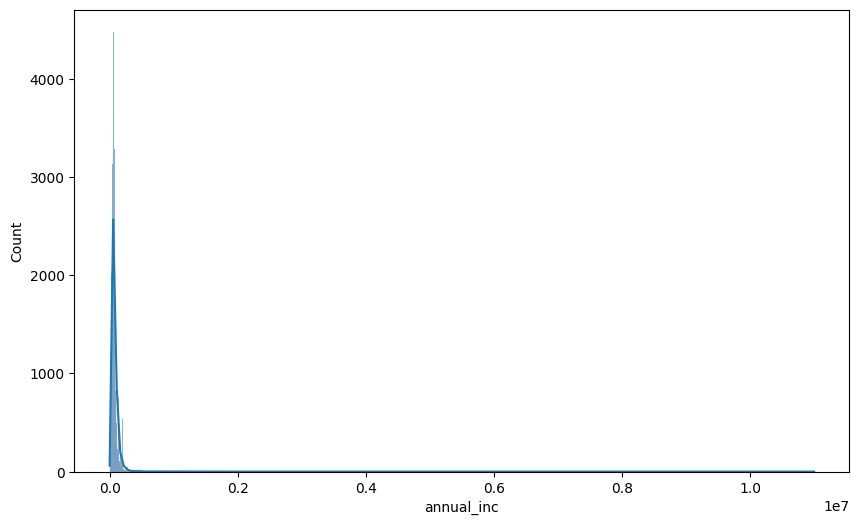

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_dropped,x='annual_inc',kde=True)

print(f'Histogram of the distribution of {field_to_statistic}')

The impact of the outliers seems to be quite significant. Also, the high standard variation indicates level of variability in the distribution

In [38]:
field_to_statistic='loan_amnt'

mean = df_dropped[field_to_statistic].mean()
mean=f"{mean:,.2f}"
median = df_dropped[field_to_statistic].median()
median=f"{median:,.2f}"
mode = df_dropped[field_to_statistic].mode()[0]
mode=f"{mode:,.2f}"
std = df_dropped[field_to_statistic].std()
std=f"{std:,.2f}"
percentiles = df_dropped[field_to_statistic].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df_dropped[field_to_statistic])

print(f'Statistical measures for: {field_to_statistic}')
print(f"Mean Amount: {mean}")
print(f"Median Amount: {median}")
print(f"Mode Amount: {mode}")
print(f"Standard Deviation Amount: {std}")
print(f"Amount Percentiles: \n{percentiles}")
print("Skewness:", skewness_value)

Statistical measures for: loan_amnt
Mean Amount: 15,332.37
Median Amount: 13,000.00
Mode Amount: 10,000.00
Standard Deviation Amount: 9,468.19
Amount Percentiles: 
0.25    8,000.00
0.50   13,000.00
0.75   20,000.00
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999


Histogram of the distribution of loan_amnt


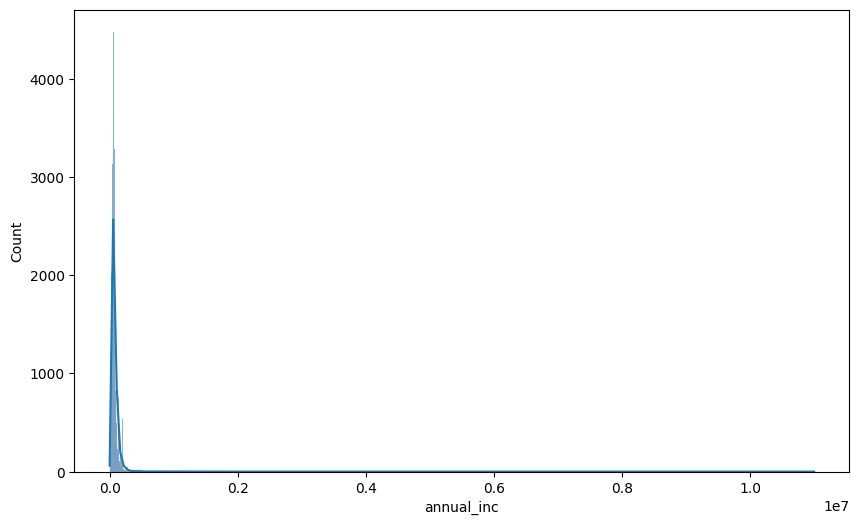

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dropped,x='annual_inc',kde=True)

print(f'Histogram of the distribution of {field_to_statistic}')

Looking at the mean and median, the outliers do not seem to have a severe impact as per annual income variable

In [40]:
field_to_statistic='debt_to_income'

mean = df_dropped[field_to_statistic].mean()
mean=f"{mean:,.2f}"
median = df_dropped[field_to_statistic].median()
median=f"{median:,.2f}"
mode = df_dropped[field_to_statistic].mode()[0]
mode=f"{mode:,.2f}"
std = df_dropped[field_to_statistic].std()
std=f"{std:,.2f}"
percentiles = df_dropped[field_to_statistic].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df_dropped[field_to_statistic])

print(f'Statistical measures for: {field_to_statistic}')
print(f"Mean Amount: {mean}")
print(f"Median Amount: {median}")
print(f"Mode Amount: {mode}")
print(f"Standard Deviation Amount: {std}")
print(f"Amount Percentiles: \n{percentiles}")
print("Skewness:", skewness_value)

Statistical measures for: debt_to_income
Mean Amount: 0.87
Median Amount: 0.20
Mode Amount: 0.20
Standard Deviation Amount: 119.90
Amount Percentiles: 
0.25   0.12
0.50   0.20
0.75   0.30
Name: debt_to_income, dtype: float64
Skewness: 204.63407735445102


Histogram of the distribution of debt_to_income


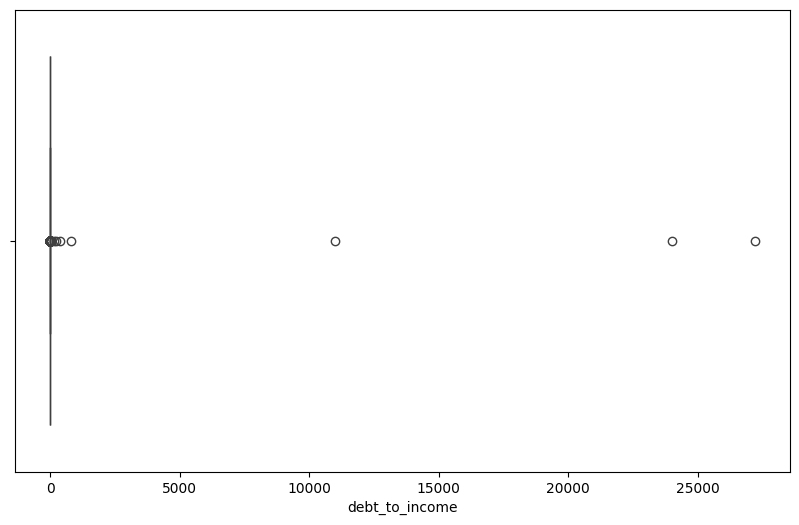

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_dropped['debt_to_income'])

print(f'Histogram of the distribution of {field_to_statistic}')

As per annual income, the outliers effect is significant for the debt_to_income variable.

The following approach taken will cap all the outliers to the 95th percentile. no rows have been removed from the dataset using this approach. Also, deciding to use the 95th percentile as cap allowed to treat only the selected variable, maintaining the relationship between the rest of the data and the overall structure. 

In [42]:
outliers_field='loan_amnt'

Q1 = df_dropped[outliers_field].quantile(0.25)
Q3 = df_dropped[outliers_field].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_dropped[(df_dropped[outliers_field] < lower_bound) | (df_dropped[outliers_field] > upper_bound)]
outliers_perc=len(outliers_iqr)/len(df_dropped)
outliers_perc=f"{outliers_perc:,.2%}"
print(f"Outliers detected using IQR: {len(outliers_iqr)}, that is {outliers_perc} of total observations")

Outliers detected using IQR: 2400, that is 2.40% of total observations


In [43]:
outliers_field='annual_inc'

Q1 = df_dropped[outliers_field].quantile(0.25)
Q3 = df_dropped[outliers_field].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_dropped[(df_dropped[outliers_field] < lower_bound) | (df_dropped[outliers_field] > upper_bound)]
outliers_perc=len(outliers_iqr)/len(df_dropped)
outliers_perc=f"{outliers_perc:,.2%}"
print(f"Outliers detected using IQR: {len(outliers_iqr)}, that is {outliers_perc} of total observations")

Outliers detected using IQR: 5205, that is 5.21% of total observations


In [44]:
outliers_field='debt_to_income'

Q1 = df_dropped[outliers_field].quantile(0.25)
Q3 = df_dropped[outliers_field].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_dropped[(df_dropped[outliers_field] < lower_bound) | (df_dropped[outliers_field] > upper_bound)]
outliers_perc=len(outliers_iqr)/len(df_dropped)
outliers_perc=f"{outliers_perc:,.2%}"
print(f"Outliers detected using IQR: {len(outliers_iqr)}, that is {outliers_perc} of total observations")

Outliers detected using IQR: 2198, that is 2.20% of total observations


Value to be applied as cap: 170,000.00


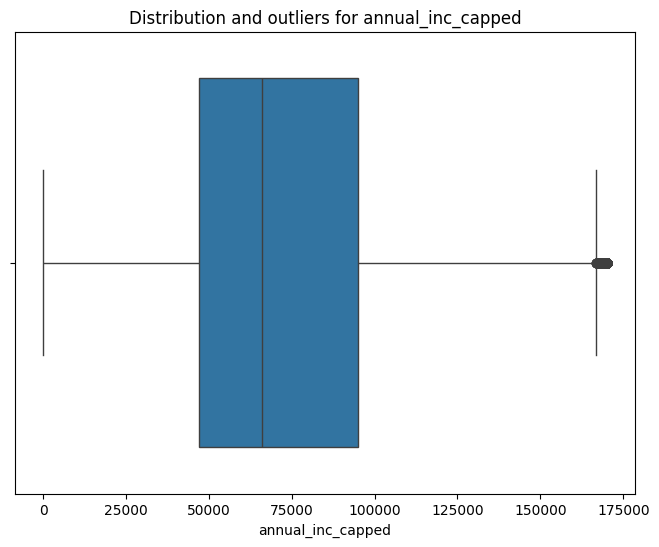

In [45]:
field_to_treat='annual_inc'

field_to_treat_capped = f"{field_to_treat}_capped"


cap_value = df_dropped[field_to_treat].quantile(0.95)
df_dropped[field_to_treat_capped] = np.where(df_dropped[field_to_treat] > cap_value, cap_value, df_dropped[field_to_treat])
cap_value=f"{cap_value:,.2f}"
print(f"Value to be applied as cap: {cap_value}")


field_to_plot = field_to_treat_capped


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 35,000.00


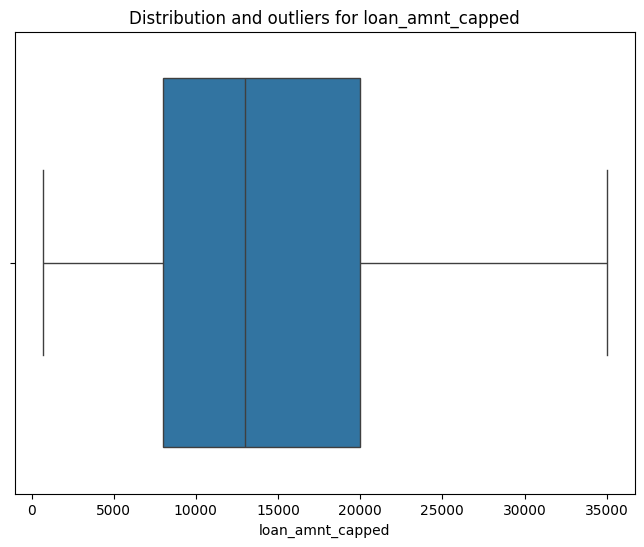

In [46]:
field_to_treat='loan_amnt'

field_to_treat_capped = f"{field_to_treat}_capped"


cap_value = df_dropped[field_to_treat].quantile(0.95)
df_dropped[field_to_treat_capped] = np.where(df_dropped[field_to_treat] > cap_value, cap_value, df_dropped[field_to_treat])
cap_value=f"{cap_value:,.2f}"
print(f"Value to be applied as cap: {cap_value}")


field_to_plot = field_to_treat_capped


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 0.46


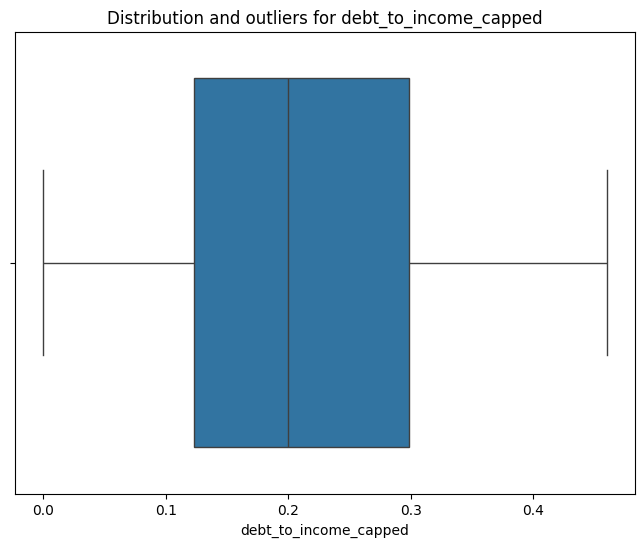

In [47]:
field_to_treat='debt_to_income'

field_to_treat_capped = f"{field_to_treat}_capped"


cap_value = df_dropped[field_to_treat].quantile(0.95)
df_dropped[field_to_treat_capped] = np.where(df_dropped[field_to_treat] > cap_value, cap_value, df_dropped[field_to_treat])
cap_value=f"{cap_value:,.2f}"
print(f"Value to be applied as cap: {cap_value}")


field_to_plot = field_to_treat_capped


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

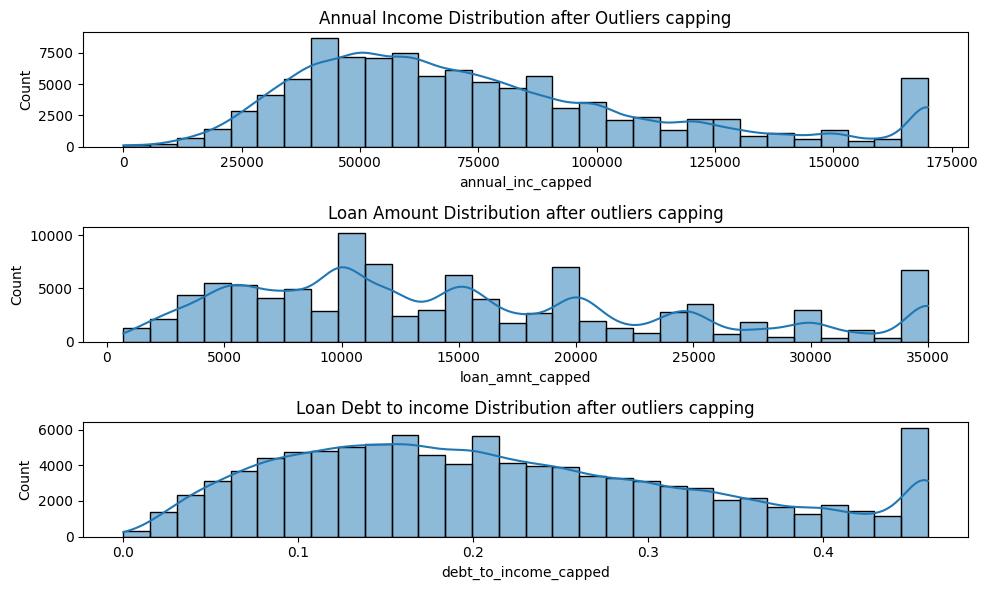

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
sns.histplot(df_dropped['annual_inc_capped'], bins=30, kde=True)
plt.title('Annual Income Distribution after Outliers capping')


plt.subplot(3, 1, 2)
sns.histplot(df_dropped['loan_amnt_capped'], bins=30, kde=True)
plt.title('Loan Amount Distribution after outliers capping')

plt.subplot(3, 1, 3)
sns.histplot(df_dropped['debt_to_income_capped'], bins=30, kde=True)
plt.title('Loan Debt to income Distribution after outliers capping')

plt.tight_layout()
plt.show()

In [49]:
df_dropped[['loan_amnt','loan_amnt_capped','annual_inc','annual_inc_capped','debt_to_income','debt_to_income_capped']].describe().apply(lambda x: x.apply('{0:,.2f}'.format))

,loan_amnt,loan_amnt_capped,annual_inc,annual_inc_capped,debt_to_income,debt_to_income_capped
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,"15,332.37","15,205.16","80,029.18","75,381.01",0.87,0.22
std,"9,468.19","9,166.51","87,224.34","38,493.77",119.90,0.12
min,700.00,700.00,0.00,0.00,0.00,0.00
25%,"8,000.00","8,000.00","47,160.50","47,160.50",0.12,0.12
50%,"13,000.00","13,000.00","66,000.00","66,000.00",0.20,0.20
75%,"20,000.00","20,000.00","95,000.00","95,000.00",0.30,0.30
max,"40,000.00","35,000.00","10,999,200.00","170,000.00","27,200.00",0.46


The impact of the treatment is more evident on the annual_inc & debt_to_income variables with a larger reduction in the mean.  
Quite significant is the max value in debt_to_income before the treatment.  
Also, the decreasen in the standard deviation underlined a reduction in the level of variability.

Overall, the outliers % was not significant. This allowed to adopt this treatment.

## Relationship analysis



Firther analysis have been conducted for a subset of variables:
- debt_to_income
- emp_lenght_group
- grade
- interest_rate
- purpose

They have been selected because:
- debt_to_income summarizes the two main numerical variables, loan_amnt & annual_inc
- int_rate indicates the gross mark up the company is applying
- grade refers to the risk customers represent for the bank
- purpose & emp_lenght_group give inights on personal life of the customers

In [50]:
#Creating the subset

subset=df_dropped[['debt_to_income','emp_length_group','grade','int_rate_clean','purpose']]

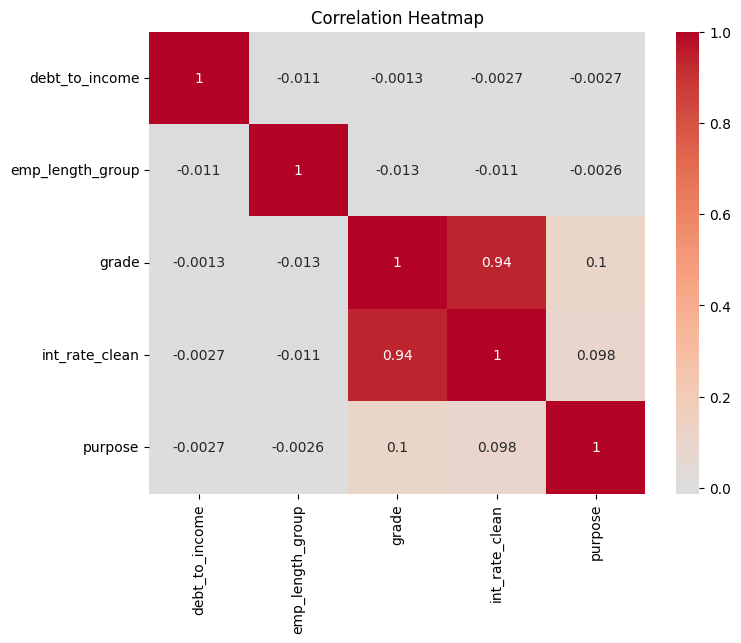

In [51]:
#Heatamp

plt.figure(figsize=(8, 6))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

There is a strong correlaton between int_rate & grade. The rest of the correlations seem not to be significant

Text(0.5, 1.0, 'Barplot Grades')

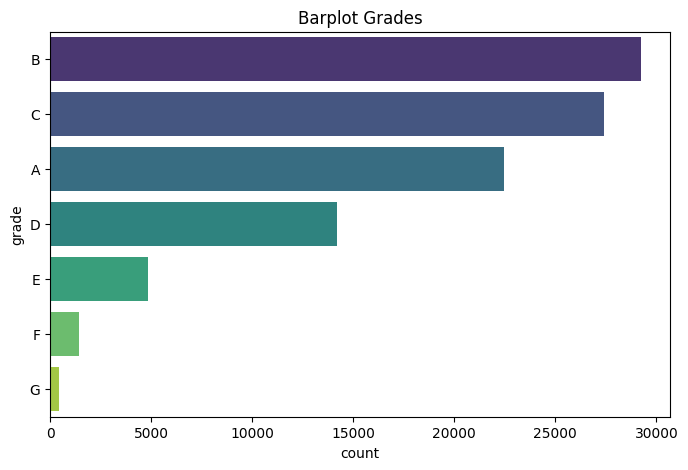

In [52]:
grade_counts=df['grade'].value_counts().reset_index()
grade_counts.columns=['grade','count']
sorted_grades=grade_counts.sort_values(by='count',ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='count',y='grade',data=sorted_grades,palette='viridis')

plt.title('Barplot Grades')

In [53]:
summary=df_dropped.groupby('grade')['int_rate_clean'].agg(['count','mean','median'])

pd.options.display.float_format = '{:,.2f}'.format
summary=summary.sort_values(by='count',ascending=False)

summary

,count,mean,median
grade,,,
1,29216,0.11,0.11
2,27400,0.14,0.14
0,22457,0.07,0.07
3,14212,0.19,0.18
4,4872,0.22,0.22
5,1423,0.25,0.24
6,420,0.28,0.28


In [54]:
summary=df_dropped.groupby('grade')['debt_to_income'].agg(['count','mean','median'])

pd.options.display.float_format = '{:,.2f}'.format
summary=summary.sort_values(by='count',ascending=False)

summary

,count,mean,median
grade,,,
1,29216,1.97,0.19
2,27400,0.64,0.21
0,22457,0.22,0.17
3,14212,0.27,0.23
4,4872,0.45,0.27
5,1423,0.30,0.30
6,420,0.31,0.31


The grade B includes the largest number of customers and the avg interest of 11%.  
The most riskiest customers are facing significant interest rates (from grade D onwards).  
Moving to the debt to income, the clusters B,C and A are influenced by outliers. In the riskest grades the mean and median are quite aligned.

Text(0.5, 1.0, 'Barplot Purpose')

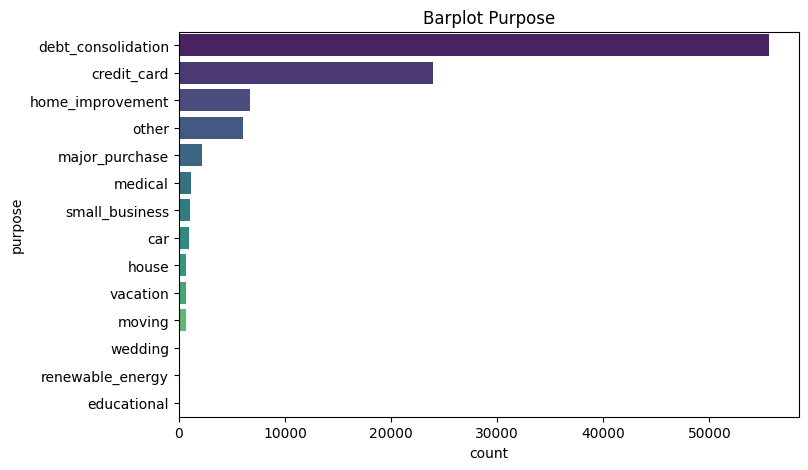

In [55]:
grade_counts=df['purpose'].value_counts().reset_index()
grade_counts.columns=['purpose','count']
sorted_grades=grade_counts.sort_values(by='count',ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='count',y='purpose',data=sorted_grades,palette='viridis')

plt.title('Barplot Purpose')

In [56]:
summary=df_dropped.groupby('purpose')['int_rate_clean'].agg(['count','mean','median'])

pd.options.display.float_format = '{:,.2f}'.format
summary=summary.sort_values(by='count',ascending=False)

summary

,count,mean,median
purpose,,,
2,55647,0.13,0.13
1,23954,0.12,0.11
4,6673,0.13,0.12
9,6096,0.14,0.14
6,2223,0.13,0.12
7,1177,0.14,0.13
11,1061,0.15,0.14
0,987,0.12,0.12
5,697,0.14,0.14


The different loan purposes do not have strong influence of outliers. The avg interest rate is quite consistent across the different values with the highest values (0.16) recored for renewable energy.

## Feature scaling

A standard scaler will be applied to all the numercial variables. This dataset will then be used in the next sections for building the machine learning models.

In [57]:
from sklearn.preprocessing import StandardScaler #type:ignore``

numerical_columns=df_dropped.select_dtypes(include=['float64','int64']).columns

scaler=StandardScaler()
df_scaled=df_dropped.copy()

df_scaled[numerical_columns]=scaler.fit_transform(df_dropped[numerical_columns])

# ML Models

The main scope of this project is to provide Lending Club company with a tool to improve the loan grade assignment process.  

In this section different machine learning models have been tested for this scope:
- the first test compared a logistic regression vs random classifier;
- the random classifier recorded a better performance; few improvments techniques have been tested: rebalancing; feature selection, paramters selection.
- last model has been a neural network model
 
The entire scaled dataset has been used. As mentioned above, the target variable is Grade.  
Test size has been at 20% for Logistic regression and 30% for Random classifier, with 42 as random stae in both cases.


## Logistic regression

In [58]:
X = df_scaled.drop(columns=['grade'])
y = df_scaled['grade']

In [59]:
from sklearn.impute import SimpleImputer #type:ignore
imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.linear_model import LogisticRegression #type:ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model_1 = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [62]:
model_1.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [63]:
predictions = model_1.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix #type:ignore

accuracy_model_1 = accuracy_score(y_test, predictions)
precision_model_1 = precision_score(y_test, predictions,average='weighted')
recall_model_1 = recall_score(y_test, predictions,average='weighted')
f1_model_1 = f1_score(y_test, predictions,average='weighted')
roc_auc_model_1 = roc_auc_score(y_test, model_1.predict_proba(X_test),multi_class='ovr')

cm_model_1 = confusion_matrix(y_test, predictions)

In [65]:
from sklearn.model_selection import cross_val_score #type:ignore

cv_scores_model_1 = cross_val_score(model_1, X, y, cv=5, scoring='accuracy')

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier #type:ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
predictions = model_2.predict(X_test)

In [68]:
accuracy_model_2 = accuracy_score(y_test, predictions)
precision_model_2 = precision_score(y_test, predictions,average='weighted')
recall_model_2 = recall_score(y_test, predictions,average='weighted')
f1_model_2 = f1_score(y_test, predictions,average='weighted')
roc_auc_model_2 = roc_auc_score(y_test, model_2.predict_proba(X_test),multi_class='ovr')

cm_model_2 = confusion_matrix(y_test, predictions)

In [69]:
cv_scores_model_2 = cross_val_score(model_2, X, y, cv=5, scoring='accuracy')

In [70]:
print(f'Accuracy Model 1: {accuracy_model_1} vs Accuracy Model 2:{accuracy_model_2}')
print(f'Precision Model 1: {precision_model_1} vs Precision Model 2:{precision_model_2}')
print(f'Recall Model 1: {recall_model_1} vs Recall_Model_2 {recall_model_2}')
print(f'F1-Score Model 1: {f1_model_1} vs F1-Score Model 2:{f1_model_2}')
print(f'ROC-AUC Model 1: {roc_auc_model_1} vs ROC-AUC Model 2:{roc_auc_model_2}')

Accuracy Model 1: 0.29575 vs Accuracy Model 2:0.9923333333333333
Precision Model 1: 0.24052397653821403 vs Precision Model 2:0.9923532423457445
Recall Model 1: 0.29575 vs Recall_Model_2 0.9923333333333333
F1-Score Model 1: 0.20705400076448405 vs F1-Score Model 2:0.9914942029867978
ROC-AUC Model 1: 0.5171045720447344 vs ROC-AUC Model 2:0.9997230096266725


Text(0.5, 1.0, 'Confusion Matrix Model 2')

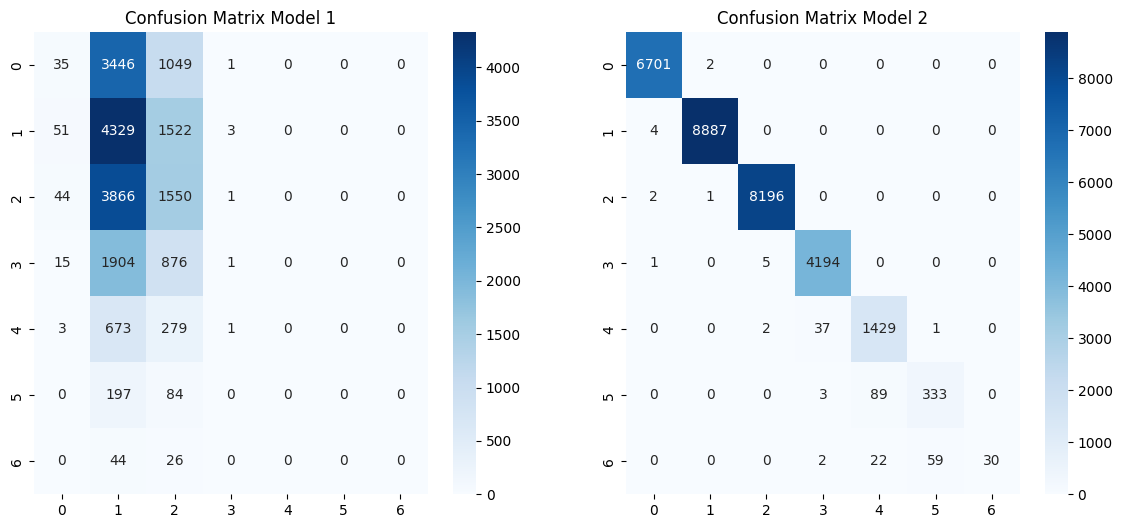

In [71]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.heatmap(cm_model_1,annot=True,fmt='d',cmap='Blues',ax=ax[0])
sns.heatmap(cm_model_2,annot=True,fmt='d',cmap='Blues',ax=ax[1])

ax[0].set_title('Confusion Matrix Model 1')
ax[1].set_title('Confusion Matrix Model 2')

In [72]:
#Cross validation

print('Cross validation Model 1:')
print(f'Cross-Validation Accuracy Scores Model 1: {cv_scores_model_1}')
print(f'Mean CV Accuracy Model 1: {cv_scores_model_1.mean()}\n')

print('Cross validation Model 2:')
print(f'Cross-Validation Accuracy Scores Model 2: {cv_scores_model_2}')
print(f'Mean CV Accuracy Model 2: {cv_scores_model_2.mean()}')

Cross validation Model 1:
Cross-Validation Accuracy Scores Model 1: [0.3006  0.292   0.29405 0.29565 0.2933 ]
Mean CV Accuracy Model 1: 0.29512

Cross validation Model 2:
Cross-Validation Accuracy Scores Model 2: [0.9928  0.993   0.99485 0.99285 0.99355]
Mean CV Accuracy Model 2: 0.9934099999999999


The Random forest had a better performance across all the parameters. 
- **Evaluation metrics**  
The performance of model_1 was overall better than model_2; all the scores was 99%, indicating a significant fit of this model.
- **Confusion matrix**   
The model_1 was not able to identify any correct values for the grades 4 5 6; the model_2 did excpeptionally well for variables 0 1 2 3, while the incidence of values not correctly identified grew for variables 4 5 6
- **Cross Validation**  
The model_2 demnostrates a stronger predictive capability.  

Considering the performance obtained with model_2, in the next sub sections the scope will be to further improve these results through:  
1- feature selection  
2- hypertuning  
3- rebalancing 

Logistic Regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. This assumption may not hold for multi-value variables with complex relationships.

## Rebalancing

In [73]:
#Checking the balance of target variable

class_counts = df['grade'].value_counts()
print(class_counts)

grade
B    29216
C    27400
A    22457
D    14212
E     4872
F     1423
G      420
Name: count, dtype: int64


The variable Grade seems to be quite unbalannced for some values, with an high concentration of values B C and A.  
SMOTE operator has been applied to improve the balance of the values.  
This new dataset will be used to build a new Random classifier called model_reb to be tested vs model_2.

In [74]:
from imblearn.over_sampling import SMOTE #type:ignore

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)  

In [75]:
imputer = SimpleImputer(strategy='mean')

X_resampled = imputer.fit_transform(X_resampled)

In [76]:
X_train_reb, X_test_reb, y_train_reb, y_test_reb = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [77]:
for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")

Shape: (70000, 135)
Shape: (30000, 135)
Shape: (70000,)
Shape: (30000,)


In [78]:
model_reb = RandomForestClassifier()

In [79]:
model_reb.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
predictions_reb = model_reb.predict(X_test_reb)

In [81]:
#Evaluation metrcis and confusion matrix


accuracy_reb = accuracy_score(y_test_reb, predictions_reb)
precision_reb = precision_score(y_test_reb, predictions_reb,average='weighted')
recall_reb = recall_score(y_test_reb, predictions_reb,average='weighted')
f1_reb = f1_score(y_test_reb, predictions_reb,average='weighted')
roc_auc_reb = roc_auc_score(y_test_reb, model_reb.predict_proba(X_test_reb),multi_class='ovr')


cm_reb = confusion_matrix(y_test_reb, predictions_reb)

print(f'Accuracy Model Reb: {accuracy_reb} vs Accuracy Model 2:{accuracy_model_2}')
print(f'Precision Model Reb: {precision_reb} vs Precision Model 2:{precision_model_2}')
print(f'Recall Model Reb: {recall_reb} vs Recall_Model_2 {recall_model_2}')
print(f'F1-Score Model Reb: {f1_reb} vs F1-Score Model 2:{f1_model_2}')
print(f'ROC-AUC Model Reb: {roc_auc_reb} vs ROC-AUC Model 2:{roc_auc_model_2}')


Accuracy Model Reb: 0.8988338263697039 vs Accuracy Model 2:0.9923333333333333
Precision Model Reb: 0.9179139679348315 vs Precision Model 2:0.9923532423457445
Recall Model Reb: 0.8988338263697039 vs Recall_Model_2 0.9923333333333333
F1-Score Model Reb: 0.8924837771998926 vs F1-Score Model 2:0.9914942029867978
ROC-AUC Model Reb: 0.9968861528858115 vs ROC-AUC Model 2:0.9997230096266725


Text(0.5, 1.0, 'Confusion Matrix Model 2')

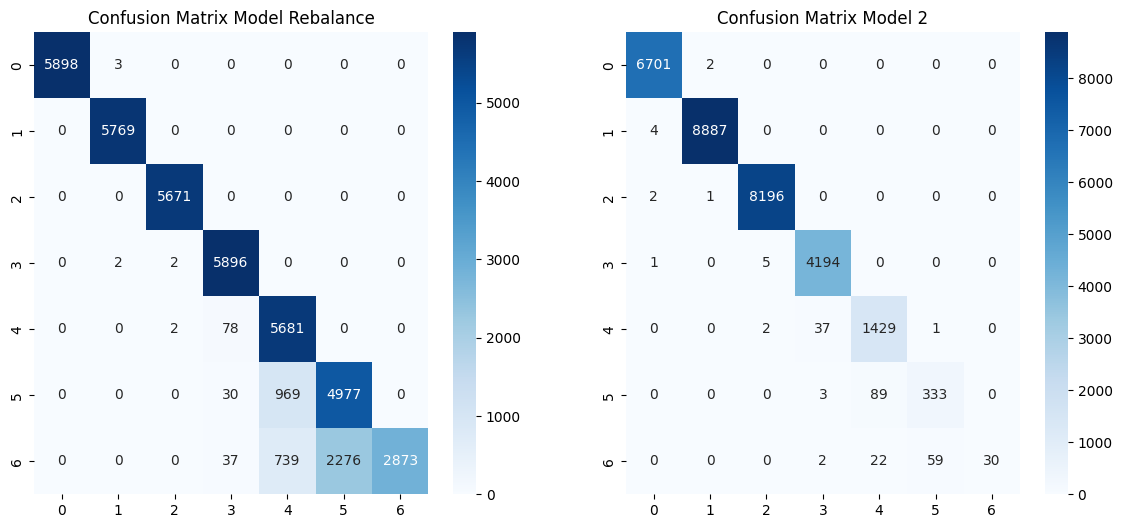

In [82]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.heatmap(cm_reb,annot=True,fmt='d',cmap='Blues',ax=ax[0])
sns.heatmap(cm_model_2,annot=True,fmt='d',cmap='Blues',ax=ax[1])

ax[0].set_title('Confusion Matrix Model Rebalance')
ax[1].set_title('Confusion Matrix Model 2')

In [83]:
#Cross validation

cv_scores_reb = cross_val_score(model_reb, X, y, cv=5, scoring='accuracy')

In [87]:
print('Cross validation Model Rebalance:')
print(f'Cross-Validation Accuracy Scores Model Reb: {cv_scores_reb}')
print(f'Mean CV Accuracy Model Reb: {cv_scores_reb.mean()}\n')

print('Cross validation Model 2:')
print(f'Cross-Validation Accuracy Scores Model 2: {cv_scores_model_2}')
print(f'Mean CV Accuracy Model 2: {cv_scores_model_2.mean()}')

Cross validation Model Rebalance:
Cross-Validation Accuracy Scores Model Reb: [0.99305 0.9929  0.9935  0.99485 0.9938 ]
Mean CV Accuracy Model Reb: 0.99362

Cross validation Model 2:
Cross-Validation Accuracy Scores Model 2: [0.9928  0.993   0.99485 0.99285 0.99355]
Mean CV Accuracy Model 2: 0.9934099999999999


Looking at the evaluation metrics, the performance of model_reb was not far from model_2; however, model_2 was better across all the metrics that have been used.  
For confusion matrix, the number of values correctly identified for the higher variables has increase due to the fact that the number of values increase as well;  
despite of that, the presence of incorrect identifications has been higher again compared to the lower variables.  
The cross validation showed an high predictive capacity for both models.

As final result of this sub section, the model_2 had a better performance. This means in terms of performance of the model, there is no need to rebalance the variables.

## Hyperparameters tuning

In this subsection, the ideal number of parameters for model_2 will be invesitgated through GridSearchCV.

First, a dictionary specifying the hyperparameters to be tuned and their possible values has been defined:
- n_estimators: The number of decision trees in the Random Forest model, with possible values of 50 and 200.
- max_depth: The maximum depth of each decision tree, with possible values of 3 and 10.
- min_samples_split: The minimum number of samples required to split an internal node, with possible values of 2.

After this, the GridSearch has been prepared with the following parameters which performed the grid search over the specified hyperparameters:
- estimator: the base estimator to be tuned, which is model_2 (Random forest) in this case.
- param_grid: the dictionary of hyperparameters to be tuned, as defined above.
- cv: the number of folds for cross-validation, set to 2.
- n_jobs: the number of jobs to run in parallel, set to -1.
- verbose: the verbosity level, set to 3.

In [85]:
from sklearn.model_selection import GridSearchCV #type:ignore

#Setting up the parameters for Random Forest

param_grid = {
    'n_estimators': [50, 200], 
    'max_depth': [3, 10],     
    'min_samples_split': [2]  
}


grid_search = GridSearchCV(estimator=model_2,
                           param_grid=param_grid,
                           cv=2,
                           n_jobs=-1,
                           verbose=3)

In [88]:
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 10], 'min_samples_split': [2],
                         'n_estimators': [50, 200]},
             verbose=3)

In [89]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
#A new random classifier model has been defined using the parameters obtained with GridSearch

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_rf.fit(X_train, y_train)


y_pred_best = best_rf.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best,average='weighted')
recall_best = recall_score(y_test, y_pred_best,average='weighted')
f1_best = f1_score(y_test, y_pred_best,average='weighted')
roc_auc_best = roc_auc_score(y_test, best_rf.predict_proba(X_test),multi_class='ovr')


cm_best = confusion_matrix(y_test, y_pred_best)

print(f'Accuracy Model Best: {accuracy_best} vs Accuracy Model 2:{accuracy_model_2}')
print(f'Precision Model Best: {precision_best} vs Precision Model 2:{precision_model_2}')
print(f'Recall Model Best: {recall_best} vs Recall_Model_2 {recall_model_2}')
print(f'F1-Score Model Best: {f1_best} vs F1-Score Model 2:{f1_model_2}')
print(f'ROC-AUC Model Best: {roc_auc_best} vs ROC-AUC Model 2:{roc_auc_model_2}')

Accuracy Model Best: 0.9644666666666667 vs Accuracy Model 2:0.9923333333333333
Precision Model Best: 0.9605484376217296 vs Precision Model 2:0.9923532423457445
Recall Model Best: 0.9644666666666667 vs Recall_Model_2 0.9923333333333333
F1-Score Model Best: 0.957121340189409 vs F1-Score Model 2:0.9914942029867978
ROC-AUC Model Best: 0.9982165941201206 vs ROC-AUC Model 2:0.9997230096266725


Text(0.5, 1.0, 'Confusion Matrix Model 2')

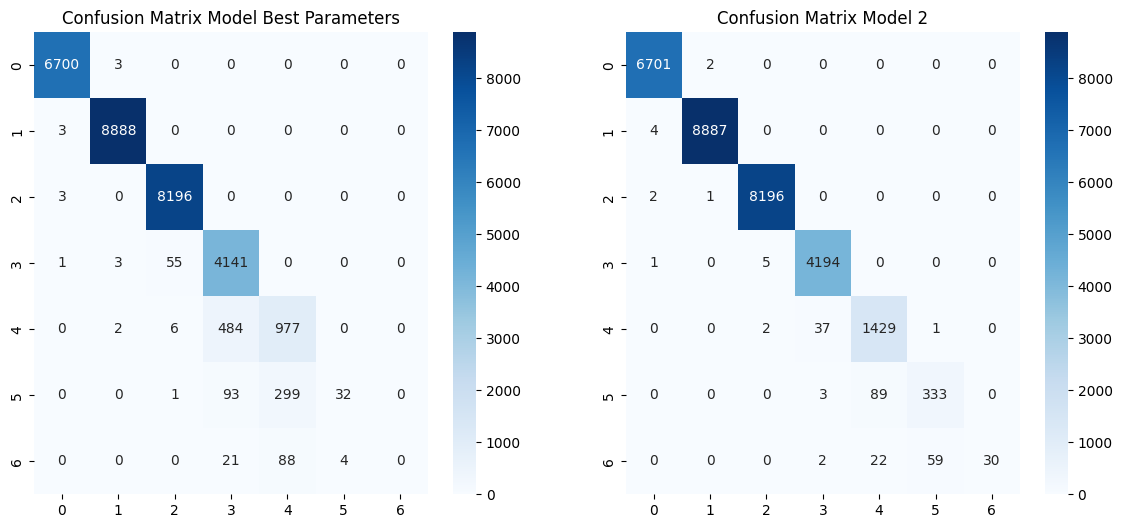

In [92]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.heatmap(cm_best,annot=True,fmt='d',cmap='Blues',ax=ax[0])
sns.heatmap(cm_model_2,annot=True,fmt='d',cmap='Blues',ax=ax[1])

ax[0].set_title('Confusion Matrix Model Best Parameters')
ax[1].set_title('Confusion Matrix Model 2')

In [93]:
cv_scores_best = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

In [94]:
print('Cross validation Model Best Parameters:')
print(f'Cross-Validation Accuracy Scores Model Best Parameters: {cv_scores_best}')
print(f'Mean CV Accuracy Model Best Parameters: {cv_scores_best.mean()}\n')

print('Cross validation Model 2:')
print(f'Cross-Validation Accuracy Scores Model 2: {cv_scores_model_2}')
print(f'Mean CV Accuracy Model 2: {cv_scores_model_2.mean()}')

Cross validation Model Best Parameters:
Cross-Validation Accuracy Scores Model Best Parameters: [0.96355 0.9707  0.96555 0.9648  0.96485]
Mean CV Accuracy Model Best Parameters: 0.9658899999999999

Cross validation Model 2:
Cross-Validation Accuracy Scores Model 2: [0.9928  0.993   0.99485 0.99285 0.99355]
Mean CV Accuracy Model 2: 0.9934099999999999


While the performance was very similar in terms of evaluation metrics (with very minimal difference across the different metrics),
the Confusion matrix has shown a better performance of model_2 again.  
The real strenght so far is its capacity to identify the correctl values for variables 4 5 6, where the rest of the model did not succed.  
Also, the cross validation scores mean was slighty higher in model_2, however the predictive capacity of model_best is significant as well.

After the hypertuning, the performance of the original model_2 remain more solid than the model built with the best selection of parameters.


## Features selection

For the next model a feature selection has been applied.  
The model_2 has performed significantly well so far. However, the computional effort is significant due to large dimension of the datset.  
Using RFE, the best 20 variables has been selected for model_2 and the final performance compared to the original model.  
The 20 variables have been selected performing 30 steps at time.


In [95]:
X = df_scaled.drop(columns=['grade'])
y = df_scaled['grade']
X_columns = X.columns

X = pd.DataFrame(imputer.fit_transform(X))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
from sklearn.feature_selection import RFE #type:ignore

rfe = RFE(estimator=model_2,
          n_features_to_select=20, 
          step=30,                 
          verbose = 3)


rfe.fit(X_train, y_train)

Fitting estimator with 135 features.
Fitting estimator with 105 features.
Fitting estimator with 75 features.
Fitting estimator with 45 features.


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20,
    step=30, verbose=3)

In [97]:
selected_features = X_train.columns[rfe.support_]
selected_features_names = X_columns[selected_features]
print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index([0, 2, 3, 7, 16, 17, 26, 27, 31, 34, 35, 36, 51, 57, 64, 65, 97, 127,
       128, 129],
      dtype='int64')
Column names: Index(['id', 'installment', 'sub_grade', 'issue_d', 'fico_range_low',
       'fico_range_high', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'mths_since_rcnt_il', 'all_util', 'bc_open_to_buy', 'bc_util',
       'total_bc_limit', 'term_numeric', 'int_rate_clean', 'revo_util_clean'],
      dtype='object')


In [98]:
model_2_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_2_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred_selected = model_2_selected.predict(X_test[selected_features])
y_prob_selected = model_2_selected.predict_proba(X_test[selected_features])

In [101]:
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected,average='weighted')
recall_selected = recall_score(y_test, y_pred_selected,average='weighted')
f1_selected = f1_score(y_test, y_pred_selected,average='weighted')
roc_auc_selected = roc_auc_score(y_test, y_prob_selected,multi_class='ovr')

cm_selected = confusion_matrix(y_test, y_pred_selected)

print(f'Accuracy Model Selected: {accuracy_selected} vs Accuracy Model 2:{accuracy_model_2}')
print(f'Precision Model Selected: {precision_selected} vs Precision Model 2:{precision_model_2}')
print(f'Recall Model Selected: {recall_selected} vs Recall_Model_2 {recall_model_2}')
print(f'F1-Score Model Selected: {f1_selected} vs F1-Score Model 2:{f1_model_2}')
print(f'ROC-AUC Model Selected: {roc_auc_selected} vs ROC-AUC Model 2:{roc_auc_model_2}')

Accuracy Model Selected: 0.9997 vs Accuracy Model 2:0.9923333333333333
Precision Model Selected: 0.999700056196009 vs Precision Model 2:0.9923532423457445
Recall Model Selected: 0.9997 vs Recall_Model_2 0.9923333333333333
F1-Score Model Selected: 0.9996992184469626 vs F1-Score Model 2:0.9914942029867978
ROC-AUC Model Selected: 0.9999985381694394 vs ROC-AUC Model 2:0.9997230096266725


Text(0.5, 1.0, 'Confusion Matrix Model 2')

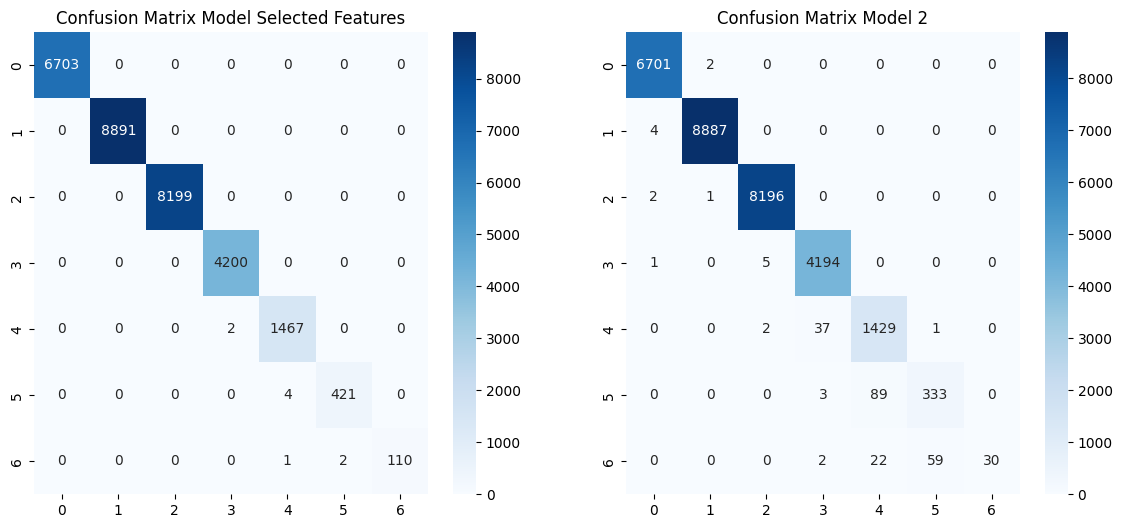

In [103]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.heatmap(cm_selected,annot=True,fmt='d',cmap='Blues',ax=ax[0])
sns.heatmap(cm_model_2,annot=True,fmt='d',cmap='Blues',ax=ax[1])

ax[0].set_title('Confusion Matrix Model Selected Features')
ax[1].set_title('Confusion Matrix Model 2')

In [104]:
cv_scores_selected = cross_val_score(model_2_selected, X, y, cv=5, scoring='accuracy')

In [105]:
print('Cross validation Model Selected Parameters:')
print(f'Cross-Validation Accuracy Scores Model Selected Parameters: {cv_scores_selected}')
print(f'Mean CV Accuracy Model Selected Parameters: {cv_scores_selected.mean()}\n')

print('Cross validation Model 2:')
print(f'Cross-Validation Accuracy Scores Model 2: {cv_scores_model_2}')
print(f'Mean CV Accuracy Model 2: {cv_scores_model_2.mean()}')

Cross validation Model Selected Parameters:
Cross-Validation Accuracy Scores Model Selected Parameters: [0.9928  0.993   0.99485 0.99285 0.99355]
Mean CV Accuracy Model Selected Parameters: 0.9934099999999999

Cross validation Model 2:
Cross-Validation Accuracy Scores Model 2: [0.9928  0.993   0.99485 0.99285 0.99355]
Mean CV Accuracy Model 2: 0.9934099999999999


The new model_2_selected had a significant perfmormance.  
- **Evaluation metrics**  
It was slightly higher than model_2 across all the measures  
- **Confusion matrix**  
Unlike the previous models, model_2_selected correctly identified the values for the high variables, recording very few cases of not correctly identified
- **Cross validation**  
The high predictive capacity has been confirmed for this model_2

In addition to a better performance across all the evalation measures in place, model_2_selected reduced significantly the computional time and effort.  
Due to this reason, it could be a perfect fit as first model to be adopted in the business.



## Neural network

In the last sub section has been preapred and tested vs model_2_selected.  
The Neural network is a complex model that would require in any case significant computional effort and time to be used.  
The tested model has been built with three different layers and fit trough 10 different epochs.
Different treatments have been applied with Standard scaler and One hot encoder to allow the model to process correctly all the variables.
Also, activation 'softmax' has been used that is necessary with multiple values variables. The number of units in the last layer has been set equal to the number of classes of the target variable y. 

In [106]:
import tensorflow as tf # type:ignore
from tensorflow.keras.models import Sequential # type:ignore
from tensorflow.keras.layers import Dense # type:ignore
from sklearn.preprocessing import MinMaxScaler # type:ignore
from sklearn.preprocessing import OneHotEncoder # type:ignore
from sklearn.compose import ColumnTransformer #type:ignore
from sklearn.compose import ColumnTransformer #type:ignore

In [107]:
X=df_dropped.drop('grade',axis=1)
y=df_dropped['grade']

num_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=X.select_dtypes(include=['object','category','bool']).columns.tolist()

from sklearn.pipeline import Pipeline

num_trans=StandardScaler()
cat_trans=OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[('num',num_trans,num_cols),
                  ('cat',cat_trans,cat_cols)])

X_processed=preprocessor.fit_transform(X)

if y.dtype=='object' or y.dtype.name=='category':
    y=y.astype('category').cat.codes

y=y.values

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.3,random_state=42,stratify=y)
num_feat=X_train.shape[1]
num_class=len(np.unique(y))

model_nn=Sequential()
model_nn.add(Dense(units=16,activation='relu',input_shape=(num_feat,)))
model_nn.add(Dense(units=8,activation='relu'))
model_nn.add(Dense(units=num_class,activation='softmax'))

model_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
model_nn.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.7427 - accuracy: 0.7107 - val_loss: 0.3911 - val_accuracy: 0.8476
Epoch 2/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3333 - accuracy: 0.8707 - val_loss: 0.2939 - val_accuracy: 0.8840
Epoch 3/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.8959 - val_loss: 0.2607 - val_accuracy: 0.8999
Epoch 4/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.9105 - val_loss: 0.2331 - val_accuracy: 0.9131
Epoch 5/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2207 - accuracy: 0.9204 - val_loss: 0.2165 - val_accuracy: 0.9206
Epoch 6/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2056 - accuracy: 0.9256 - val_loss: 0.2046 - val_accuracy: 0.9223
Epoch 7/10
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1955 - accuracy: 0.9302 - val_loss: 0.1987 - val_accuracy:

In [117]:
y_prob = model_nn.predict(X_test)
y_pred=np.argmax((y_prob>0.5),axis=1)

938/938 [==============================] - 1s 666us/step


In [118]:
accuracy_nn = accuracy_score(y_test, y_pred)
precision_nn = precision_score(y_test, y_pred,average='weighted')
recall_nn = recall_score(y_test, y_pred,average='weighted')
f1_nn = f1_score(y_test, y_pred,average='weighted')
roc_auc_nn = roc_auc_score(y_test, y_prob,multi_class='ovr')

cm_nn = confusion_matrix(y_test, y_pred)

print(f'Accuracy Model NN: {accuracy_nn} vs Accuracy Model_2_Selected:{accuracy_selected}')
print(f'Precision Model NN: {precision_nn} vs Precision Model_2_Selected:{precision_selected}')
print(f'Recall Model NN: {recall_nn} vs Recall Model_2_Selected {recall_selected}')
print(f'F1-Score Model NN: {f1_nn} vs F1-Score Model_2_Selected:{f1_selected}')
print(f'ROC-AUC Model NN: {roc_auc_nn} vs ROC-AUC Model_2_Selected:{roc_auc_selected}')

Accuracy Model NN: 0.9341333333333334 vs Accuracy Model_2_Selected:0.9997
Precision Model NN: 0.933294974614191 vs Precision Model_2_Selected:0.999700056196009
Recall Model NN: 0.9341333333333334 vs Recall Model_2_Selected 0.9997
F1-Score Model NN: 0.933035322268423 vs F1-Score Model_2_Selected:0.9996992184469626
ROC-AUC Model NN: 0.99473404347444 vs ROC-AUC Model_2_Selected:0.9999985381694394


Text(0.5, 1.0, 'Confusion Matrix Model_2_Selected')

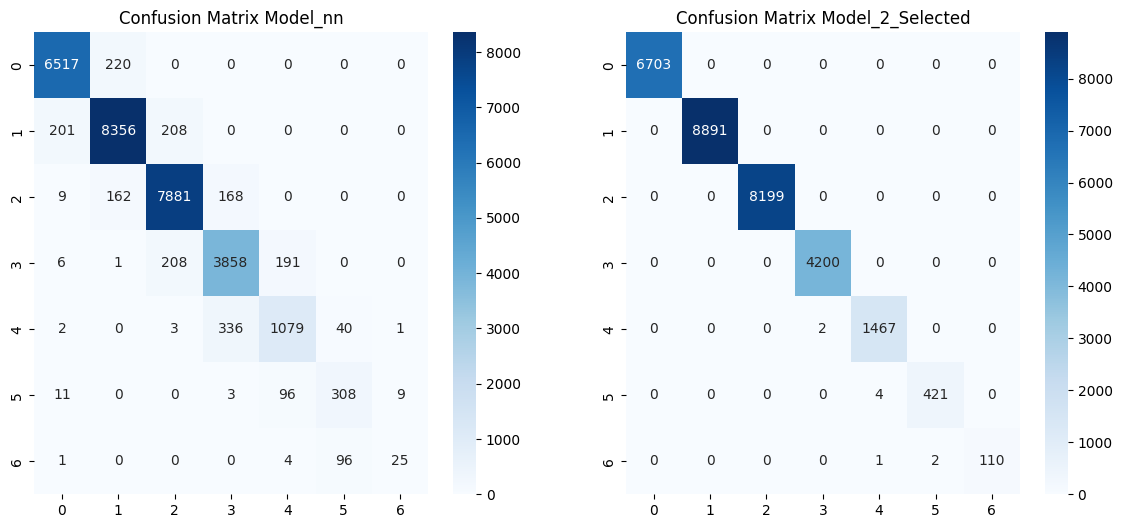

In [121]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.heatmap(cm_nn,annot=True,fmt='d',cmap='Blues',ax=ax[0])
sns.heatmap(cm_selected,annot=True,fmt='d',cmap='Blues',ax=ax[1])

ax[0].set_title('Confusion Matrix Model_nn')
ax[1].set_title('Confusion Matrix Model_2_Selected')

The neural network model had a significant performance in terms of evalaution metrics, with small differences compared to model_2_selected.  
However the confusion matrix confirmred the solid the performance of model_2_selected able to identify correctly the highest number of variables.

# Conclusion

Starting from the provided dataset containing data for the peiod 2007-2020, different solutions have been prepared and tested to give to Lending Club company a first tool able to imprve the prediction of the loan grade.  
The obtained results has shown significant results. After an initial treatment and exploratory step, some machine learning models have been investigated and assessed.

To summarize:  
1- An initial data cleaning step has been performed, involving:
  - dropping of columns deemed not required
  - treatment of columns containing text values
  - treatment of date columns
  - treatment of null values and label encoder application
  - removing of duplicates  
This is a preliminary step that is necessay to allow to use the dataset to extract insights and make predictions.  

2- Exploratory analysis has been performed as following step, completing the actions below:
  - adding two new variables through Feature engineering techniques to have a better representation of the variable (emp_lenght_group) and new insights from the dataset (debt_to_income)
  - performing statistical measures analysis for the main numerical variables, including loan_amnt, annual_inc and debt_to_income
  - analyzing the outliers impact on the three variables mentioned above, applying a cap to the third quantile due significant impact on the distribution depsite of low numbers (less than 5% of the total observations)
  - exploring relationship between selected variables using an heatmap and expanding therefore with barplots
  - applying standard scaler to numerical variables for better use of the machine learning models

3-  As final step of this project, different machine learning models have been tested to predict the loan **Grade**; startinng from a logistic regressor vs Random forest, few new solutions have been tried:
  - logistic regressor confirmed not to be a good fit if there is no clear linear relationship between the different variables; its performance was significantly poor
  - random forest had a solid perfmormance at first, indicating a significant fit for this dataset; model_2 performed well across all the evaluation metrics and cross validation. The confusion matrix indicated some difficulties to predict correctly the highest values 4 5 6. 
  - As following steps, the performance improvments of model_2 has been tested using different methods:
    - rebalancing: the distribution of the different values seemed not to be uniform for the variable Grade; using SMOTE operator the values have been rebalanced; however, the moder built with the new datset (model_reb) did not perform better than the original model_2
    -hyperparameter tuning: the model_2 has been tuned using GridSearch to define the best number of parameters to be set; however as per the previous case, the model best_rb perfored quite similarly in therms of evaluation metrics and cross validation, but did not predict as precise as the model_2 in the confusion matrix.
    - feature selection: starting from the original dataset, the 20 best variables for model_2 have been selected using RFE; the new model_2_selected had the best performance: it has been able to reduce the number of incorrect predicted values in the confusion matrix; in addition, te computional time reduced significantly as well: this can be considered a strong advantage, especially for a business keen to implement machine learning models for the first time.
  - a neural network model has been tested vs the model_2_selected; three different layers have been used; the performance has been signifcant, however it requires significant computional effort, so it is not properly indicated for small companies.


  Overall, all the models performed quite significantly, indicating a good quality of the datset to make predictions.  
  In conclusion, the recommendaiton is to start using the model_2_selected that offered significant performance with relatively small computional time to predict the **Grade** for a loan application. This should help the company to improve the loan process speeding up the Grade assignment process.


    
